NOTE: This is just a practice work, inspired from the work of <b> Will Koehrsen </b> <br>
<b>Medium </b> blog on PairPlotting --> <a href='https://towardsdatascience.com/visualizing-data-with-pair-plots-in-python-f228cf529166'> Visualizing Data with Pairs Plots in Python </a> <br>
<b>GITHUB </b>code of PairPlotting --> <a href='https://github.com/WillKoehrsen/Data-Analysis/blob/master/pairplots/Pair%20Plots.ipynb'> PairPlots </a>

In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

#set text size
matplotlib.rcParams['font.size'] = 18

import seaborn as sns
sns.set_context('talk', font_scale=1.2);

In [2]:
df = pd.read_csv('data.csv',sep='\t')
df.head()

country continent  year  lifeExp       pop   gdpPercap
0  Afghanistan      Asia  1952   28.801   8425333  779.445314
1  Afghanistan      Asia  1957   30.332   9240934  820.853030
2  Afghanistan      Asia  1962   31.997  10267083  853.100710
3  Afghanistan      Asia  1967   34.020  11537966  836.197138
4  Afghanistan      Asia  1972   36.088  13079460  739.981106

In [3]:
df.tail()

country continent  year  lifeExp       pop   gdpPercap
1699  Zimbabwe    Africa  1987   62.351   9216418  706.157306
1700  Zimbabwe    Africa  1992   60.377  10704340  693.420786
1701  Zimbabwe    Africa  1997   46.809  11404948  792.449960
1702  Zimbabwe    Africa  2002   39.989  11926563  672.038623
1703  Zimbabwe    Africa  2007   43.487  12311143  469.709298

In the data, each row represents observations for one country in of a single year. The format 
of this is is known is <b> Tidy data </b>
It has two categorical vatiables ( Country and continent)
Each column is self-explanatory, such as "lifeExp" represents life expectancy at birth in years,
"pop" represents populations of the country in that year, "gdpPercap" represents GDP (Gross Domestice Product) per person in units of <a href='https://en.wikipedia.org/wiki/International_dollar' >international dollars </a>

### Using PairPlots for Plotting
The default pairs plot in seaborn only plots numerical columns 

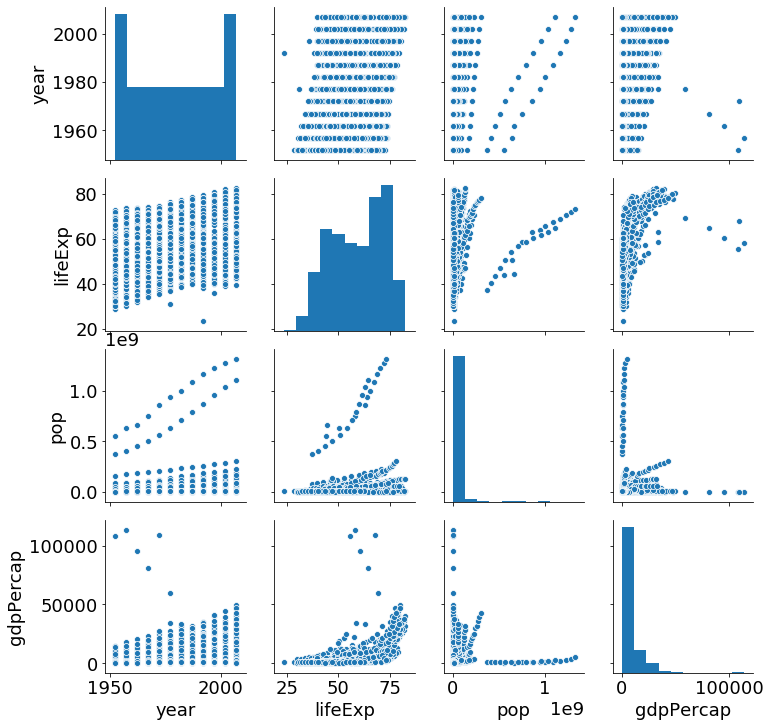

In [4]:
sns.pairplot(df)

The default pairs plot by itself often gives us valuable insights. We see that life expectancy and gdp per capita are positively correlated showing that people in higher income countries tend to live longer (although this of course does not prove that one causes the other). It also appears that (thankfully) life expectancies worldwide are on the rise over time. From the histograms, we learn that the population and gdp variables are heavily right-skewed.

We can also see that the distribution of pop and gdp_per_cap is heavily skewed to the right. To better represent the data, we can take the log transform of those columns.

In [5]:
df['log_pop'] = np.log10(df['pop'])
df['log_gpd_per_cap']  = np.log10(df['gdpPercap'])
df = df.drop(columns = ['pop','gdpPercap'])

In [6]:
df

country continent  year  lifeExp   log_pop  log_gpd_per_cap
0     Afghanistan      Asia  1952   28.801  6.925587         2.891786
1     Afghanistan      Asia  1957   30.332  6.965716         2.914265
2     Afghanistan      Asia  1962   31.997  7.011447         2.931000
3     Afghanistan      Asia  1967   34.020  7.062129         2.922309
4     Afghanistan      Asia  1972   36.088  7.116590         2.869221
...           ...       ...   ...      ...       ...              ...
1699     Zimbabwe    Africa  1987   62.351  6.964562         2.848901
1700     Zimbabwe    Africa  1992   60.377  7.029560         2.840997
1701     Zimbabwe    Africa  1997   46.809  7.057093         2.898972
1702     Zimbabwe    Africa  2002   39.989  7.076515         2.827394
1703     Zimbabwe    Africa  2007   43.487  7.090298         2.671829

[1704 rows x 6 columns]

While this plot alone can be useful in an analysis, we can find make it more valuable by coloring the figures based on a categorical variable such as continent

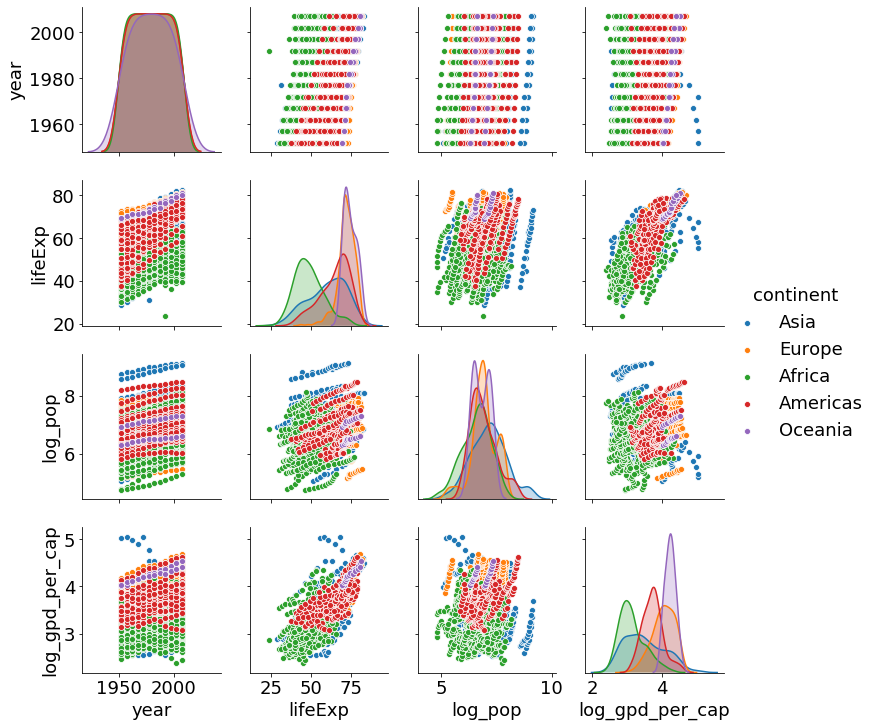

In [7]:
sns.pairplot(df,hue='continent')

Now we see that Oceania and Europe tend to have the highest life expectancies and Asia has the largest population. Notice that our log transformation of the population and gdp made these variables normally distributed which gives a more thorough representation of the values.

I don't find stacked histograms (on the diagonal) to be very useful, and there are some issues with overlapping data points (known as overplotting). We can fix these by adding in a few customizations to the pairplot call.

### Customizing pairplot

A better method for showing univariate distributions from multiple categories is the density plot. We can exchange the histogram for a density plot in the function call. While we are at it, we will pass in some keywords to the scatter plots to change the transparency, size, and edgecolor of the points.

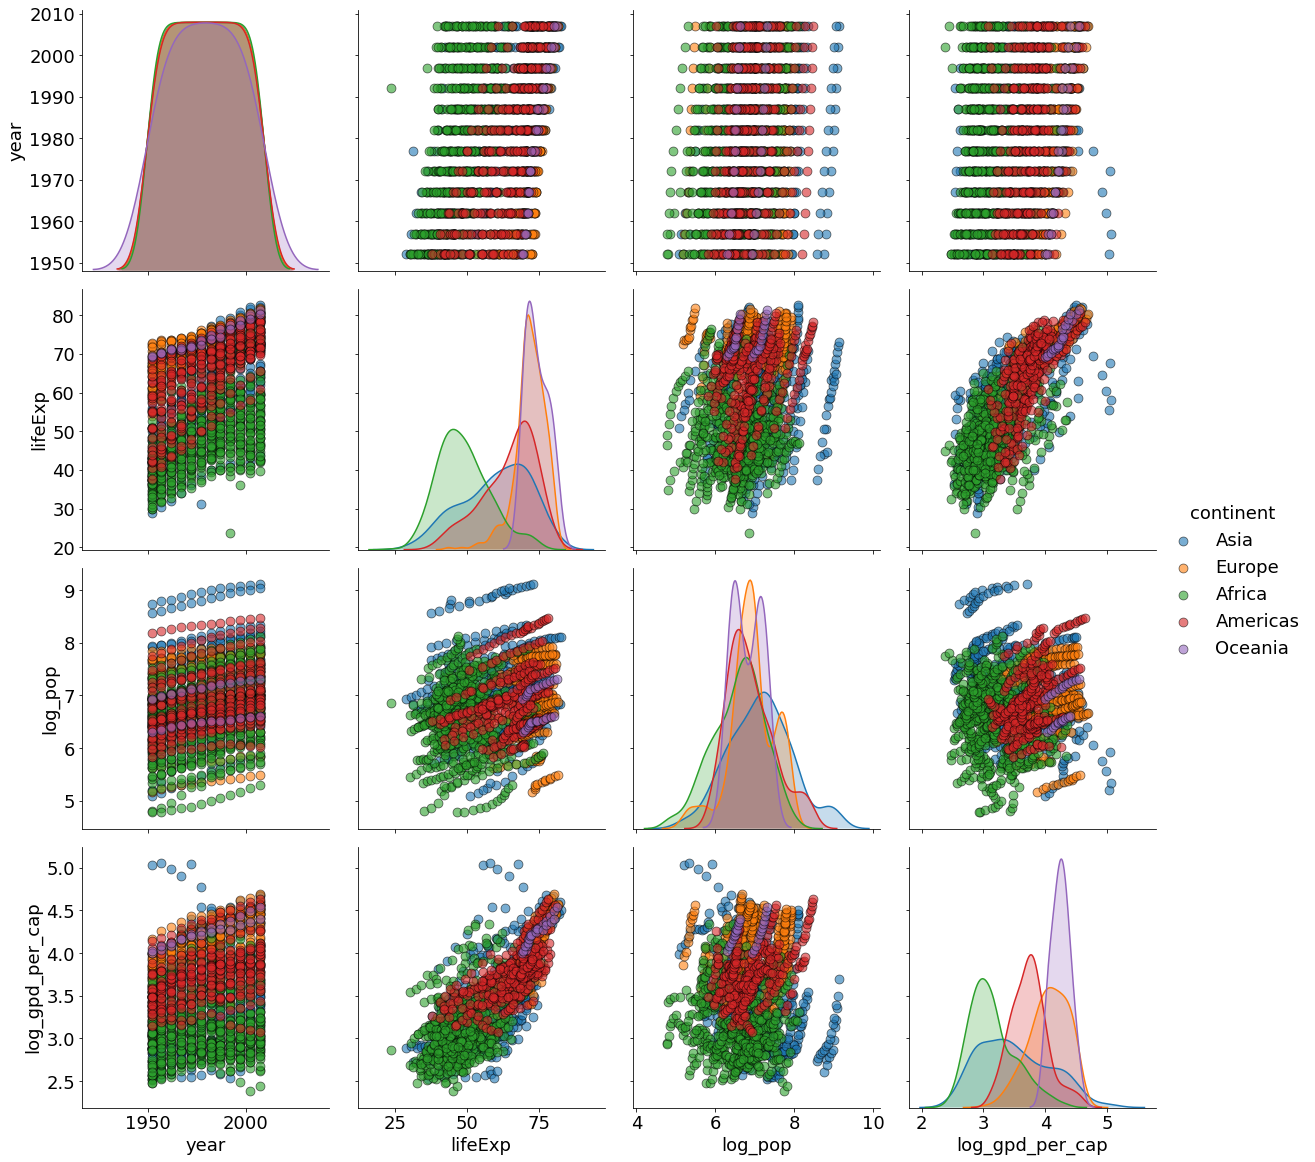

In [8]:
sns.pairplot(df,hue = 'continent',diag_kind = 'kde',plot_kws = {'alpha':0.6,
                                                               's':80,
                                                                'edgecolor':'k'}, height = 4)

Changing the transparency of the scatter plots increases readability because there is considerable overlap (known as overplotting) on these figures. <br>

That makes some of the trends more clear. We can see that Oceania and Europe tend to have the highest life expectancy and highest GDP with Asian countries tending to have the greatest population. The density plots on the diagonal are better for when we have data in multiple categories to make comparisons. We can color the plot by any variable we like. For example, here is a plot colored by a decade categorical variable we create from the year column.

In [9]:
df['decade'] = pd.cut(df['year'],bins = range(1950,2010,10))

In [10]:
df['decade']

0       (1950.0, 1960.0]
1       (1950.0, 1960.0]
2       (1960.0, 1970.0]
3       (1960.0, 1970.0]
4       (1970.0, 1980.0]
              ...       
1699    (1980.0, 1990.0]
1700    (1990.0, 2000.0]
1701    (1990.0, 2000.0]
1702                 NaN
1703                 NaN
Name: decade, Length: 1704, dtype: category
Categories (5, interval[int64]): [(1950, 1960] < (1960, 1970] < (1970, 1980] < (1980, 1990] < (1990, 2000]]

In [12]:
df

country continent  year  lifeExp   log_pop  log_gpd_per_cap  \
0     Afghanistan      Asia  1952   28.801  6.925587         2.891786   
1     Afghanistan      Asia  1957   30.332  6.965716         2.914265   
2     Afghanistan      Asia  1962   31.997  7.011447         2.931000   
3     Afghanistan      Asia  1967   34.020  7.062129         2.922309   
4     Afghanistan      Asia  1972   36.088  7.116590         2.869221   
...           ...       ...   ...      ...       ...              ...   
1699     Zimbabwe    Africa  1987   62.351  6.964562         2.848901   
1700     Zimbabwe    Africa  1992   60.377  7.029560         2.840997   
1701     Zimbabwe    Africa  1997   46.809  7.057093         2.898972   
1702     Zimbabwe    Africa  2002   39.989  7.076515         2.827394   
1703     Zimbabwe    Africa  2007   43.487  7.090298         2.671829   

                decade  
0     (1950.0, 1960.0]  
1     (1950.0, 1960.0]  
2     (1960.0, 1970.0]  
3     (1960.0, 1970.0]  
4     (1970.0, 1980.0]  
...                ...  
1699  (1980.0, 1990.0]  
1700  (1990.0, 2000.0]  
1701  (1990.0, 2000.0]  
1702               NaN  
1703               NaN  

[1704 rows x 7 columns]

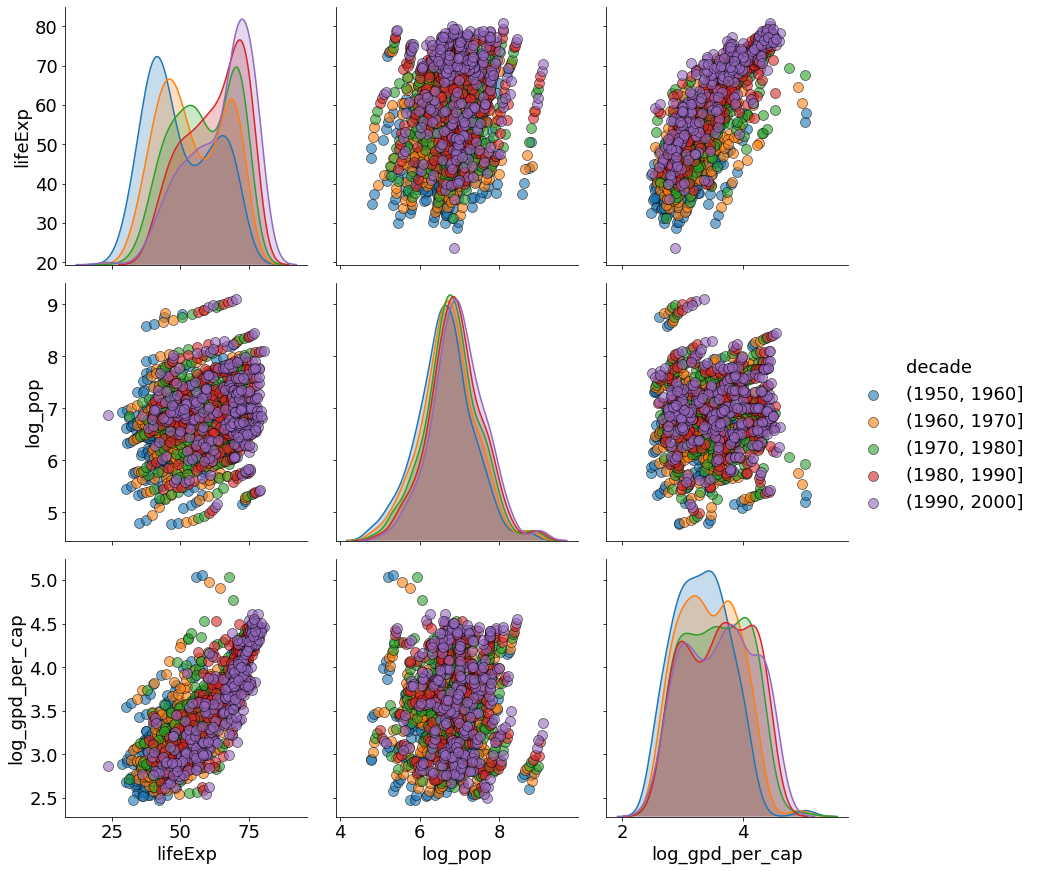

In [22]:
sns.pairplot(df,hue = 'decade',diag_kind = 'kde',vars = ['lifeExp','log_pop','log_gpd_per_cap'],plot_kws = {'alpha':0.6,
                                                                                                            's':100,
                                                                                                             'edgecolor':'k'},height = 4)


In this case, we can know see that life expectancy has increased over the decades as has population. Retaining the year variable might not make much sense when we are already coloring by the decade.

There is still quite a lot of noise on the scatter plots, mostly because we are plotting many years at once. Let's limit ourselves to the most recent year in the data. Notice how we must now use the vars keyword to specify the variables we want to plot. It does not make sense to plot the year variable since it no longer varies. We will limit the plot to the three remaining numerical variables.

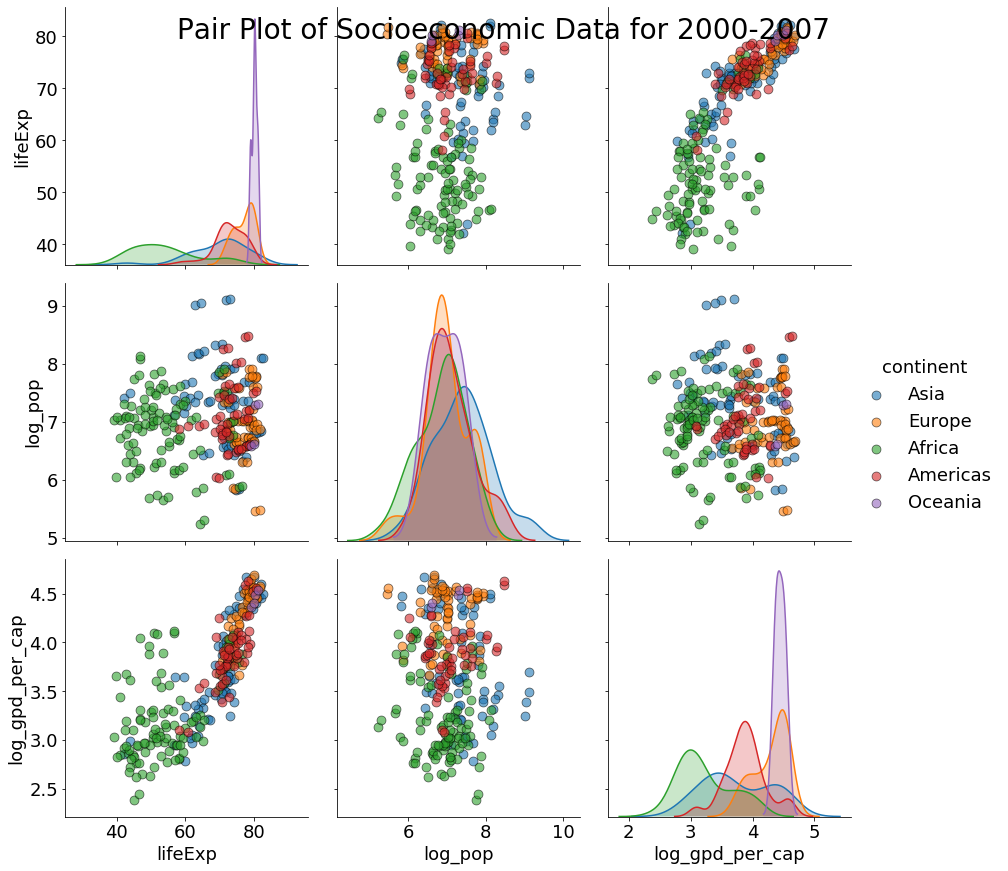

In [26]:
sns.pairplot(df[df['year'] >= 2000], vars = ['lifeExp','log_pop','log_gpd_per_cap'], 
             hue = 'continent', diag_kind = 'kde', plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'}, height = 4);
plt.suptitle('Pair Plot of Socioeconomic Data for 2000-2007', size = 28);

### Sns.PairGrid

When the options offered by pairplot are not enough, we can move on to more powerful PairGrid. This allows us to define our own functions to map to the lower and upper triangles and the diagonal. For example, we might want a plot that instead of showing two instaces of the scatter plots, shows the Pearson Correlation coefficient (a measure of a linear trend) on one of the triangles. To do this, we can just write a function to calculate the statistic and then map it to the appropriate part of the plot.

First, we will show the basic usage of sns.PairGrid. Here, we map a scatter plot to the upper triangle, a density plot to the diagonal, and a 2D density plot to the lower triangle. PairGrid is a class and not a function, which means that we need to create an instance and then use methods of that instance to build a plot. Then, after we have added all the methods to the instance, we can show the resulting plot.

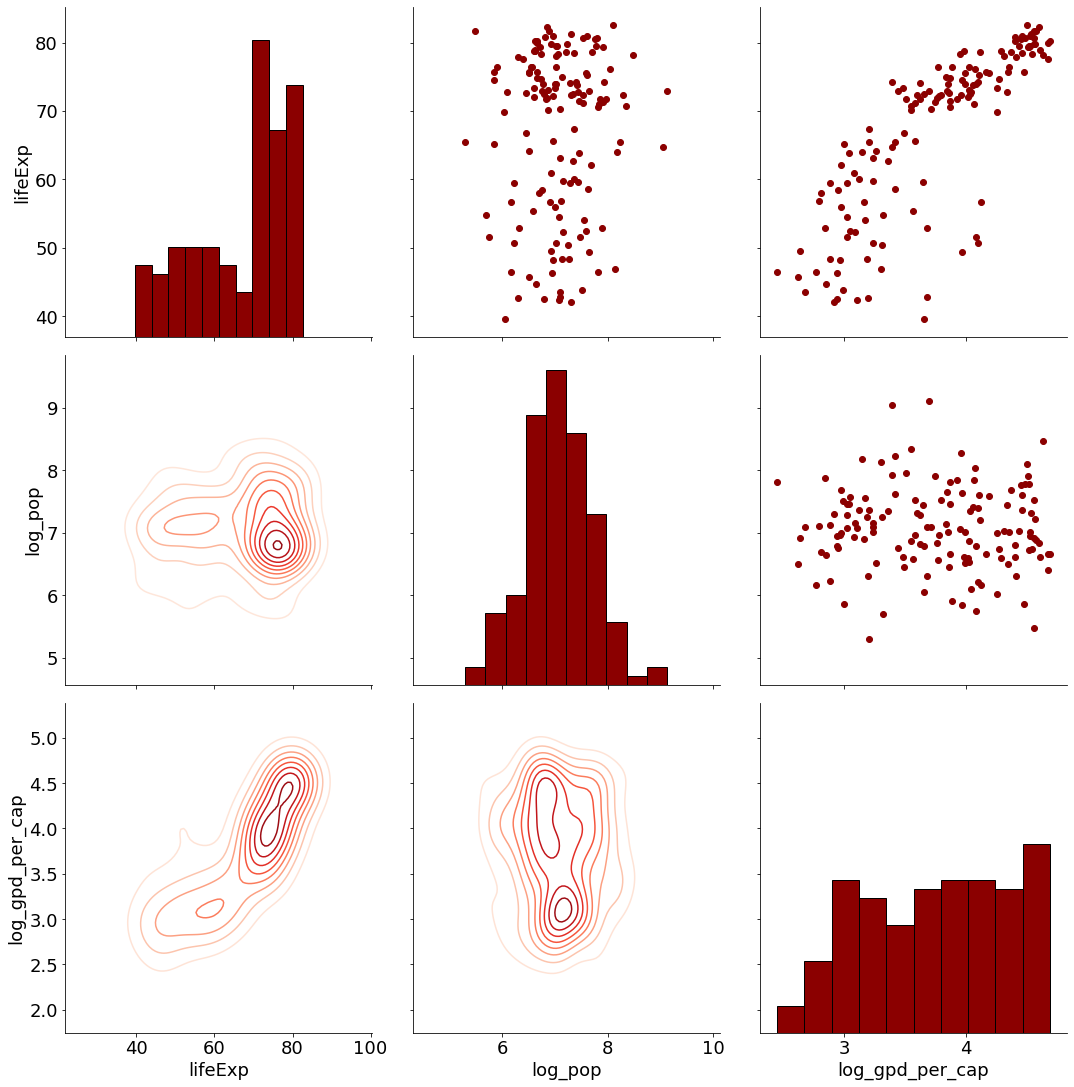

In [32]:
#Creating an object/instance of the PairGrid
grid = sns.PairGrid(data = df[df['year'] == 2007],
                   vars = ['lifeExp','log_pop','log_gpd_per_cap'],height = 5)
#map different plots to different sections 
grid = grid.map_upper(plt.scatter, color = 'darkred')
grid = grid.map_lower(sns.kdeplot, cmap = 'Reds')
grid = grid.map_diag(plt.hist, bins = 10, color = 'darkred', edgecolor = 'k');

Now that we see how to map different functions to the different elements, we can write out own function to put on the plot. We'll use a simple function to show the correlation coffiecients on the scatterplot.

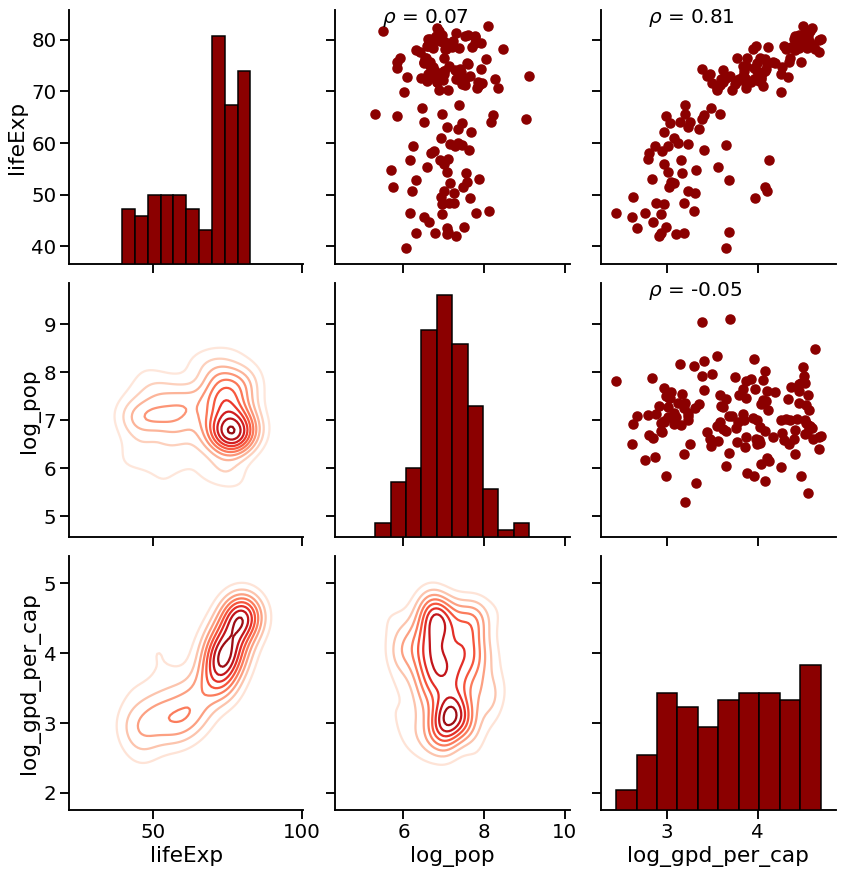

In [163]:
def corr(x,y,**kwargs):
    #calculate the coerrcoef value
    coef = np.corrcoef(x,y)[0][1]
    #make labels
    label = r'$\rho$ = ' + str(round(coef, 2))
    #add the label to the plot
    ax = plt.gca()
    ax.annotate(label,xy=(0.2,0.95),size = 20,xycoords = ax.transAxes)
#create a pair of grid instacne
grid = sns.PairGrid(data = df[df['year']==2007],
                    vars = ['lifeExp','log_pop','log_gpd_per_cap'],height = 4)
grid = grid.map_upper(plt.scatter, color = 'darkred')
grid = grid.map_upper(corr)
grid = grid.map_lower(sns.kdeplot, cmap = 'Reds')
grid = grid.map_diag(plt.hist, bins = 10, edgecolor =  'k', color = 'darkred');

We can map any function we would like to any of the areas. For example, maybe we would like to show the summary stats on the diagonal.

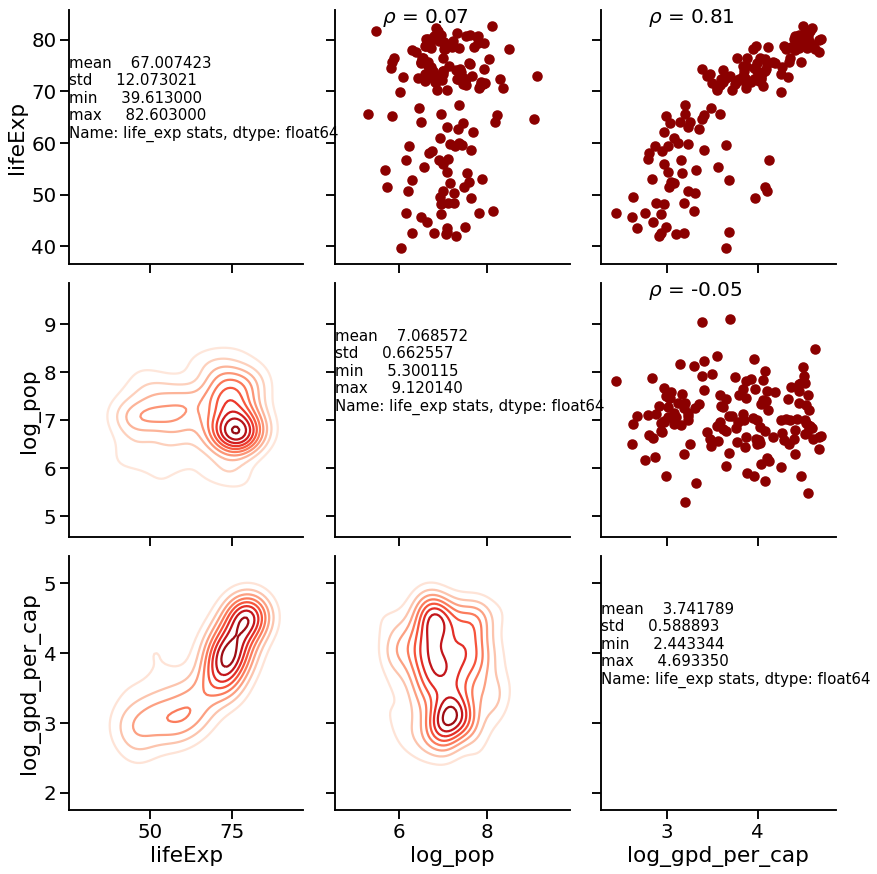

In [164]:

# Define a summary function
global label
def summary(x, **kwargs):
    # Convert to a pandas series
    x = pd.Series(x)
    #print(x)
    # Get stats for the series
    label = x.describe()[['mean', 'std', 'min', 'max']]
    if label.name == 'log_pop':
        label = 10 ** label
        label.name = 'pop stats'
    elif label.name == 'log_gdp_per_cap':
        label = 10 ** label
        label.name = 'gdp_per_cap stats'
    else:
        label.name = 'life_exp stats'
    # Convert from log to regular scale
    # Adjust the column names for presentation
  
    # Round the labels for presentation
    ax = plt.gca()
    ax.set_axis_off()
    # Add the labels to the plot
    ax.annotate(str(label),
               xy = (0.0, 0.5), size = 15,xycoords = ax.transAxes)    
    

# Create a pair grid instance
grid = sns.PairGrid(data = df[df['year']==2007],
                    vars = ['lifeExp','log_pop','log_gpd_per_cap'],height = 4)

# Fill in the mappings
grid = grid.map_upper(plt.scatter, color = 'darkred')
grid = grid.map_upper(corr)
grid = grid.map_lower(sns.kdeplot, cmap = 'Reds')
grid = grid.map_diag(summary);